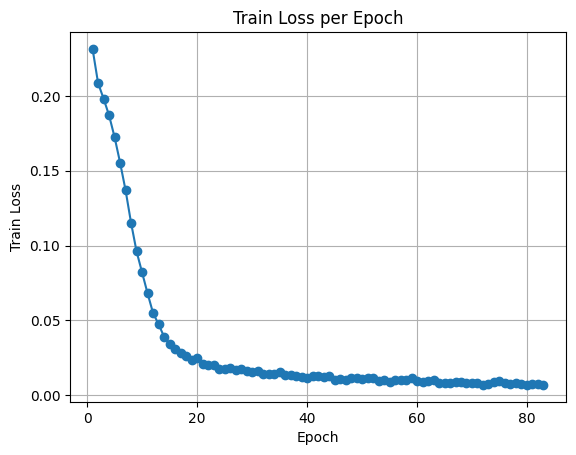

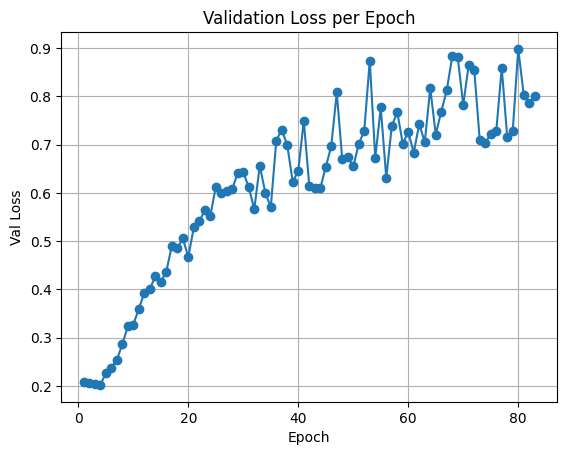

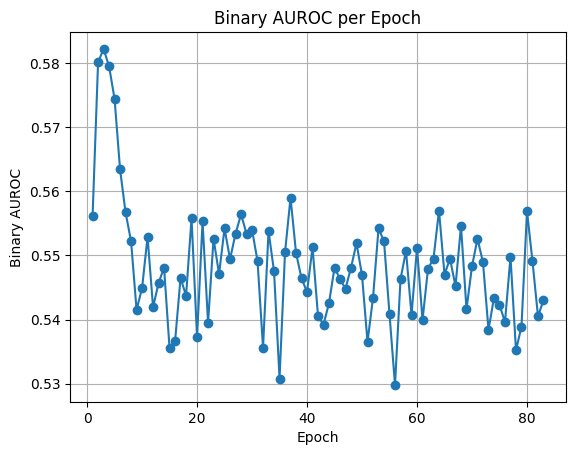

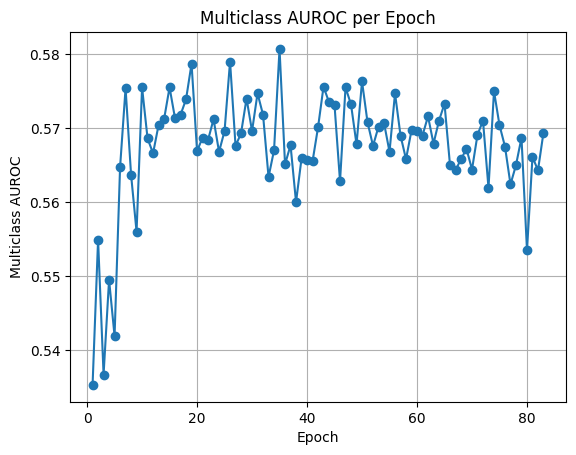

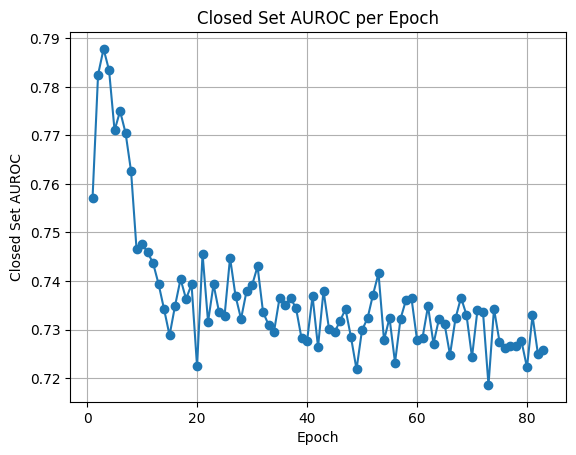

In [4]:
import re
import matplotlib.pyplot as plt

# 로그 파일 경로 (예시: "log.txt"로 저장한 경우)
log_file_path = "/nahcooy/OSR/multi_head/t_0403_04.txt"

# 그래프용 리스트 초기화
epochs = []
train_loss = []
val_loss = []
binary_auroc = []
multiclass_auroc = []
closedset_auroc = []

# 로그 파싱
with open(log_file_path, 'r') as f:
    for line in f:
        if "Epoch" in line and "Epoch" in line.split(",")[0]:
            match = re.search(r"Epoch (\d+):", line)
            if match:
                epochs.append(int(match.group(1)))
        elif "Train Loss:" in line:
            match = re.search(r"Train Loss: ([0-9.]+)", line)
            if match:
                train_loss.append(float(match.group(1)))
        elif "Val Loss:" in line:
            match = re.search(r"Val Loss: ([0-9.]+)", line)
            if match:
                val_loss.append(float(match.group(1)))
        elif "Binary (Unknown vs Known)" in line:
            match = re.search(r"AUROC: ([0-9.]+)", line)
            if match:
                binary_auroc.append(float(match.group(1)))
        elif "Multiclass - AUROC" in line:
            match = re.search(r"AUROC: ([0-9.]+)", line)
            if match:
                multiclass_auroc.append(float(match.group(1)))
        elif "Closed Set - AUROC" in line:
            match = re.search(r"AUROC: ([0-9.]+)", line)
            if match:
                closedset_auroc.append(float(match.group(1)))

# 그래프 그리기 함수
def plot_metric(x, y, title, ylabel):
    plt.figure()
    plt.plot(x, y, marker='o')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# 그래프 출력
plot_metric(epochs, train_loss, 'Train Loss per Epoch', 'Train Loss')
plot_metric(epochs, val_loss, 'Validation Loss per Epoch', 'Val Loss')
plot_metric(epochs, binary_auroc, 'Binary AUROC per Epoch', 'Binary AUROC')
plot_metric(epochs, multiclass_auroc, 'Multiclass AUROC per Epoch', 'Multiclass AUROC')
plot_metric(epochs, closedset_auroc, 'Closed Set AUROC per Epoch', 'Closed Set AUROC')
